In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(f'Features: {iris.feature_names}')
print(f'Labels: {iris.target_names}')

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42) 

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier()

In [6]:
print(f'Test score of trained iris model: {dt.score(X_test, y_test)}')

Test score of trained iris model: 1.0


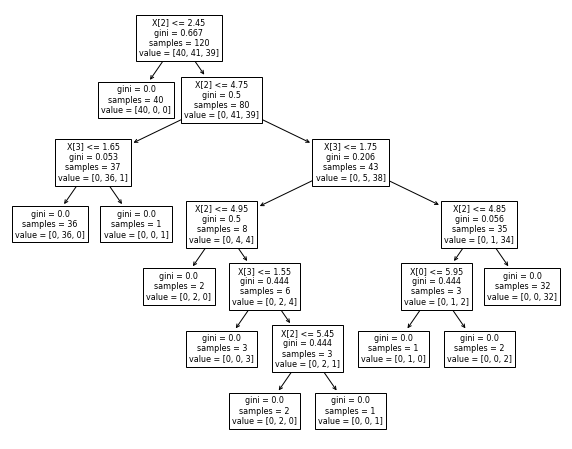

In [7]:
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(dt) 
plt.show()

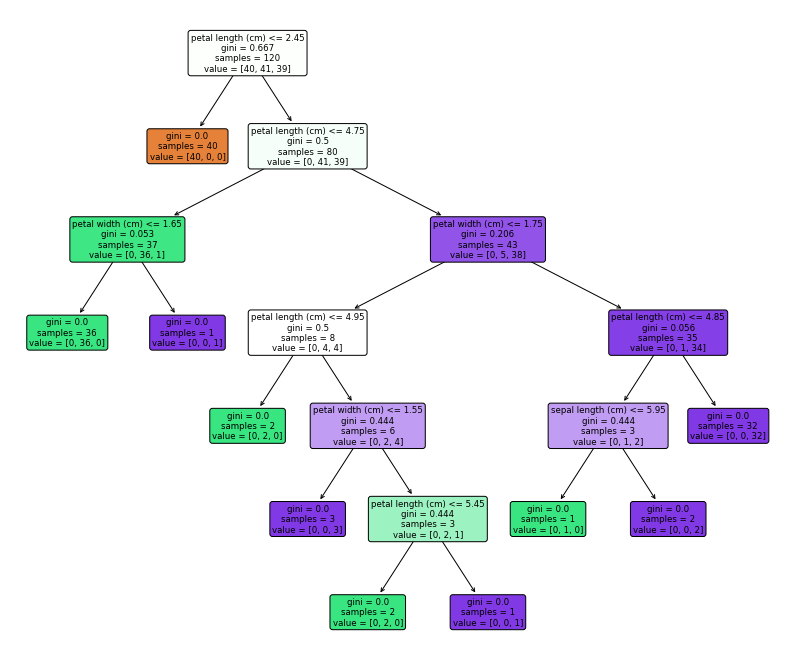

In [8]:
plt.figure(figsize=(14,12))
tree.plot_tree(dt, 
               feature_names=iris.feature_names,                
               rounded=True, filled=True,
               ) 
plt.show()

In [9]:
!pip install graphviz

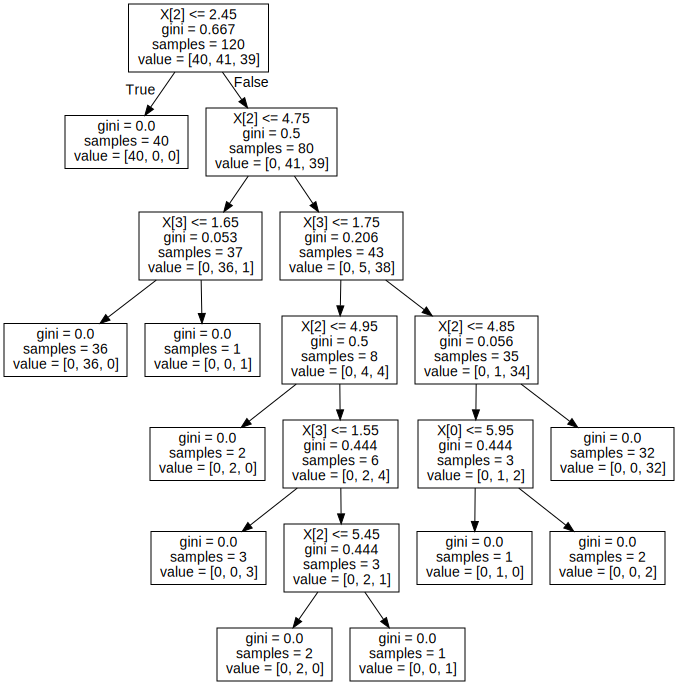

In [10]:
import graphviz 

exported_tree = tree.export_graphviz(dt) 

tree_plot = graphviz.Source(exported_tree) 
tree_plot

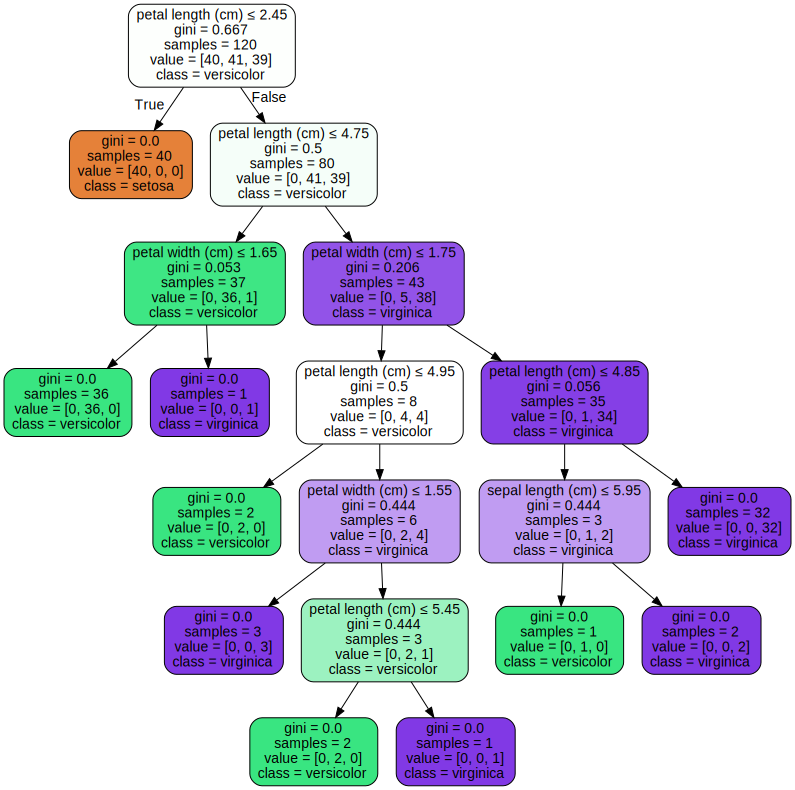

In [11]:
exported_tree = tree.export_graphviz(dt, 
                                     feature_names = iris.feature_names,  
                                     class_names = iris.target_names,  
                                     filled = True, rounded = True,  
                                     special_characters = True)

tree_plot = graphviz.Source(exported_tree)  
tree_plot

In [12]:
tree_plot.render('iris_dt')

'iris_dt.pdf'

Now we will try with Titanic dataset

In [13]:
dataset = sns.load_dataset('titanic')
print(dataset.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [14]:
dataset.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [15]:
for column in dataset.columns:
  most_common = dataset[column].value_counts().idxmax()
  dataset[column] = dataset[column].fillna(most_common)

In [16]:
encoding_map = {'sex': {'male': 0, 'female': 1}, 
                'embarked': {'C':0, 'Q':1, 'S':2},
                'class': {'First':0, 'Second':1, 'Third':2},
                'who': {'child':0, 'man':1, 'woman':2},
                'deck': {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6},
                'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2},
                'alive': {'no':0, 'yes':1},
                'survived': {0:'dead', 1:'survived'}
                }
dataset.replace(encoding_map, inplace=True)

Now we will Select Features

In [17]:
features = [feature for feature in dataset.columns if feature != 'alive']
features = [feature for feature in features if feature != 'survived']
label = ['survived']

X = dataset[features].values
y = dataset[label].values

Now test-train-valid

In [18]:
from sklearn.model_selection import train_test_split

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Creating the model

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
model.score(X_test, y_test)

0.7821229050279329

In [22]:
exported_tree = tree.export_graphviz(model,
                                     feature_names = features,  
                                     class_names = model.classes_,  
                                     filled = True, rounded = True,  
                                     special_characters = True, out_file=None)

tree_plot = graphviz.Source(exported_tree)  
tree_plot
tree_plot.render('titanic_dt')

'titanic_dt.pdf'

Trying to improve the results

In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(1,30), 
              'min_samples_split': range(2,10), 
              'min_samples_leaf': range(2,10)}

gcv = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)

In [24]:
pandas.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001495,0.000262,0.000609,0.000077,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.811189,0.797203,0.739437,0.767606,0.830986,0.789284,0.032361,1618
1,0.001349,0.000039,0.000572,0.000022,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.811189,0.797203,0.739437,0.767606,0.830986,0.789284,0.032361,1618
2,0.001311,0.000018,0.000549,0.000003,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.811189,0.797203,0.739437,0.767606,0.830986,0.789284,0.032361,1618
3,0.001332,0.000050,0.000556,0.000019,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.811189,0.797203,0.739437,0.767606,0.830986,0.789284,0.032361,1618
4,0.001312,0.000025,0.000547,0.000010,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.811189,0.797203,0.739437,0.767606,0.830986,0.789284,0.032361,1618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,0.002035,0.000088,0.000599,0.000034,29,9,5,"{'max_depth': 29, 'min_samples_leaf': 9, 'min_...",0.811189,0.811189,0.816901,0.823944,0.816901,0.816025,0.004712,70
1852,0.001947,0.000018,0.000568,0.000013,29,9,6,"{'max_depth': 29, 'min_samples_leaf': 9, 'min_...",0.797203,0.811189,0.816901,0.823944,0.816901,0.813228,0.008975,179
1853,0.001964,0.000043,0.000566,0.000012,29,9,7,"{'max_depth': 29, 'min_samples_leaf': 9, 'min_...",0.797203,0.811189,0.816901,0.823944,0.816901,0.813228,0.008975,179
1854,0.001944,0.000009,0.000567,0.000002,29,9,8,"{'max_depth': 29, 'min_samples_leaf': 9, 'min_...",0.797203,0.804196,0.816901,0.823944,0.816901,0.811829,0.009700,242


In [26]:
gcv.best_estimator_
gcv.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

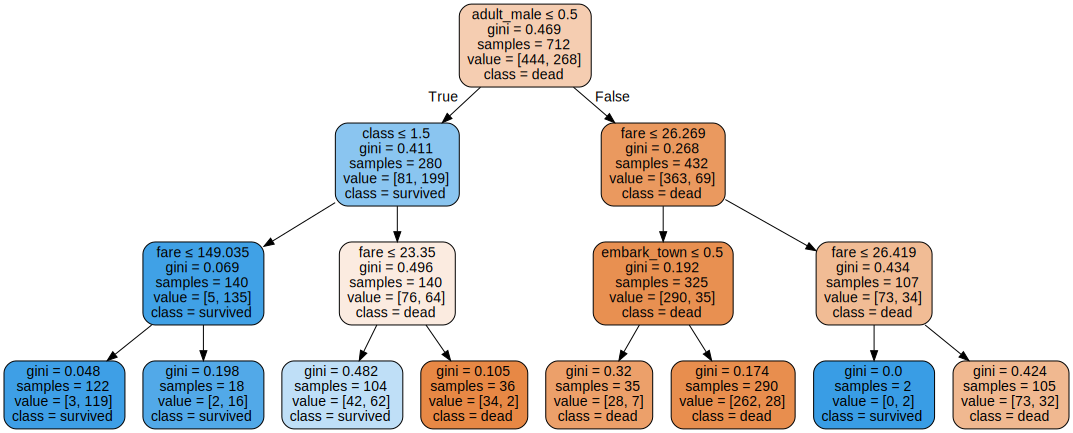

In [27]:
exported_tree = tree.export_graphviz(gcv.best_estimator_, out_file=None, 
                                     feature_names = features,  
                                     class_names = model.classes_,  
                                     filled = True, rounded = True,  
                                     special_characters = True)

tree_plot = graphviz.Source(exported_tree)  
tree_plot

In [28]:
gcv.best_estimator_.score(X_test, y_test)

0.8212290502793296

Feature Extraction


In [34]:
dataset = sns.load_dataset('iris')
encoding_map = {'species': {'setosa': 0, 'versicolor': 1, 'virginica': 2}}
dataset.replace(encoding_map, inplace=True)

In [35]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'species'

X = dataset[features]
y = dataset[label]

Manual Selection


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

feature_selection = SelectKBest(chi2, k=2)
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")

Old Shape: (150, 4) New shape: (150, 2)


In [37]:
feature_selection.scores_,  feature_selection.pvalues_

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [38]:
print('\t'.join(features))
print('\t '.join([f"{s:.5f}" for s in feature_selection.scores_]))
print('\t '.join([f"{p:.7f}" for p in feature_selection.pvalues_])) 

sepal_length	sepal_width	petal_length	petal_width
10.81782	 3.71073	 116.31261	 67.04836
0.0044765	 0.1563960	 0.0000000	 0.0000000


Automatically Selecting


In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier

In [40]:
feature_selection = SelectFromModel(LogisticRegression(tol=1e-1))
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (150, 2)


In [41]:
feature_selection = SelectFromModel(LinearSVC(tol=1e-1))
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (150, 3)


In [43]:
print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  [False  True  True  True]
Selected features:  ['sepal_width' 'petal_length' 'petal_width']


In [44]:
feature_selection = SelectFromModel(DecisionTreeClassifier())
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

New shape: (150, 1)
Selected features:  [False False False  True]
Selected features:  ['petal_width']
